In [1]:
# The first step is to load some standard python packages
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib
import datetime as dt
import matplotlib.dates as mdates

sns.set()

warnings.simplefilter("ignore")  # filter some warning messages

In [2]:
#Loading csv file as df
filename = "water quality data Dunea.csv"
df = pd.read_csv(
    filename, skipinitialspace=True, index_col=[1], parse_dates=True, dayfirst = True
)

#Translating all Dutch terms
df.index.name = "Time"
df = df.rename(columns={'Monstercode': 'Location', 'Eenheid': 'Unit', 'Waarde': 'Value', "Rapport waarde":"Reported value"})
df['Component'] = df['Component'].replace(['Zuurgraad'], 'Acidity')
df['Component'] = df['Component'].replace(['Temperatuur'], 'Temperature')

# Splitting up data into different components
# Components cannot be placed as columns since the times of measurement and locations differ
df_iopromide = df[df["Component"] == "iopromide"]
df_MTBE = df[df["Component"] == "methyl-tertiair-butylether (MTBE)"] 
df_Chloride = df[df["Component"] == "Chloride"]
df_fluopyram = df[df["Component"] == "fluopyram"]
df_Temp = df[df["Component"] == "Temperature"]
df_diclofenac = df[df["Component"] == "diclofenac"]
df_sucralose = df[df["Component"] == "sucralose"]
df_ph = df[df["Component"] == "Acidity"]

datasets = [df_iopromide, df_MTBE, df_Chloride, df_fluopyram, df_Temp, df_Chloride, df_diclofenac, df_sucralose, df_ph]

In [3]:
#Defining function that will plot the inputted dataset and optionally saves it as a png
def plot_component(df, save = True, savestring = "plot.png", title_string = "vs time", subdirectory =""):
    #Some general formatting
    #Strings can be given as an input to alter the filename or title
    Component = df["Component"][1].capitalize()
    if Component != "Temperature" and Component != "Acidity":
        conc_string = "concentration"
    else:
        conc_string = ""
    label_y = Component + conc_string +"  [" + df["Unit"][1] +"]"

    #Plotting 
    ax = df[df["Location"] == "Brakel"].plot(y = "Value", label = "Brakel", ylabel = label_y)
    df[df["Location"] == "Bernse Veer"].plot(y = "Value", label = "Bernse Veer", ylabel = label_y, ax = ax)
    plt.title(Component + " " + conc_string + " " + title_string)

    #Optinally saving 
    if save:
        directory = "Figures/" + subdirectory
        plt.savefig(directory +"/" + Component + " " + savestring)



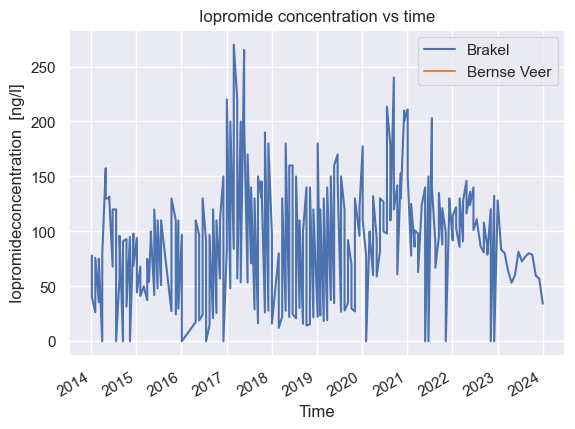

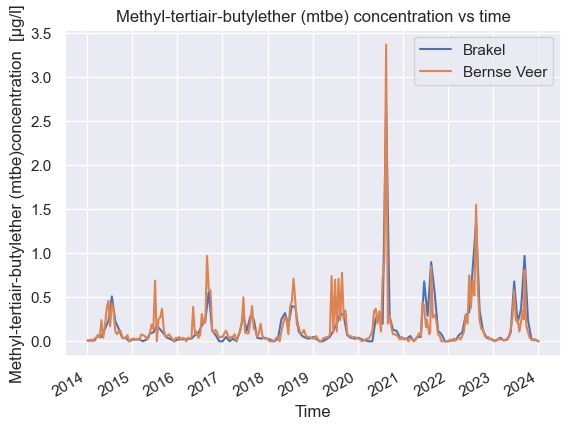

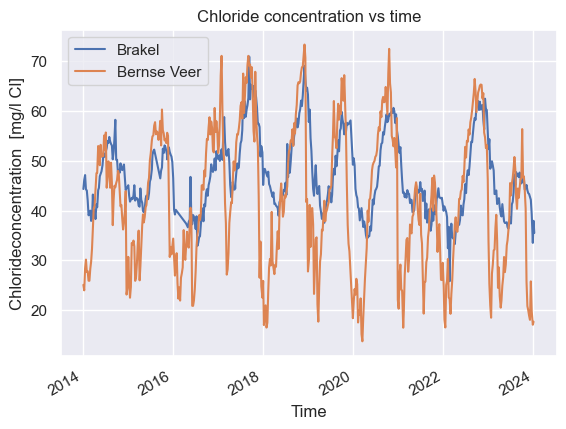

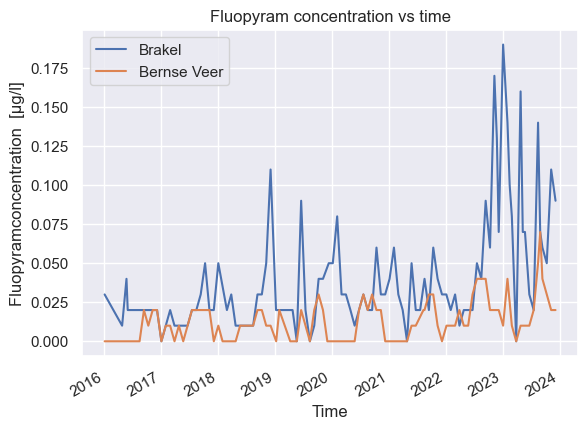

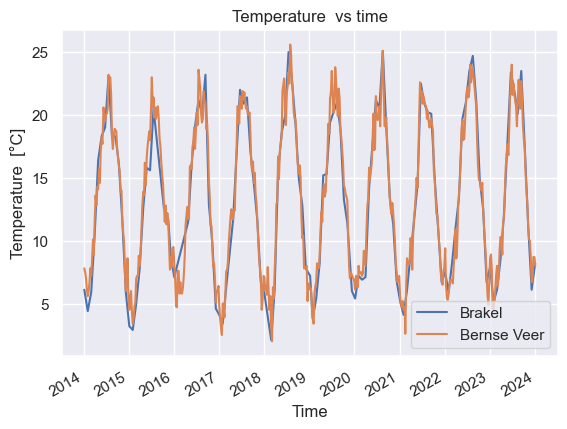

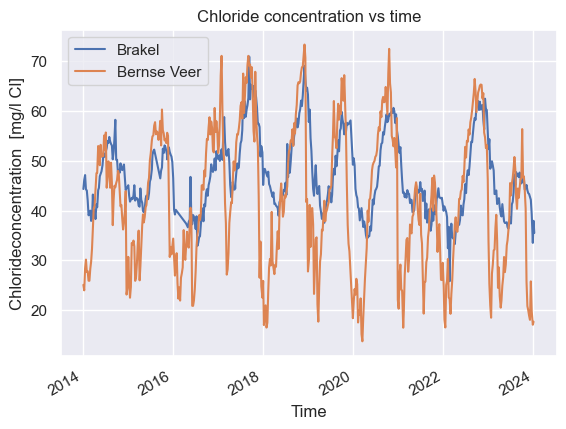

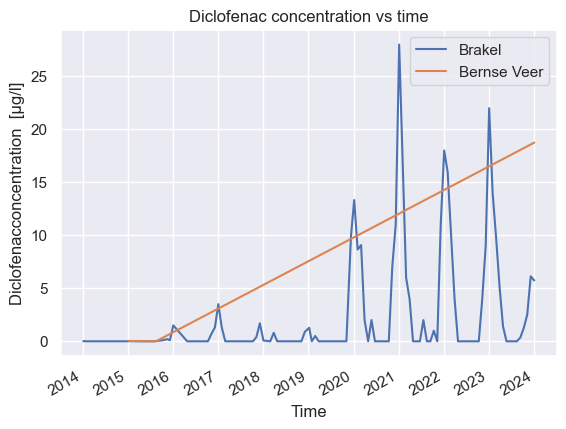

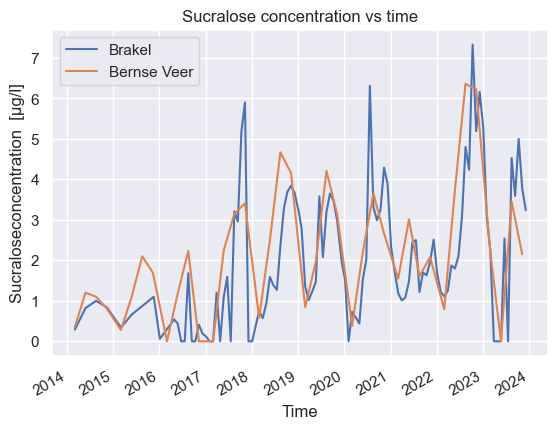

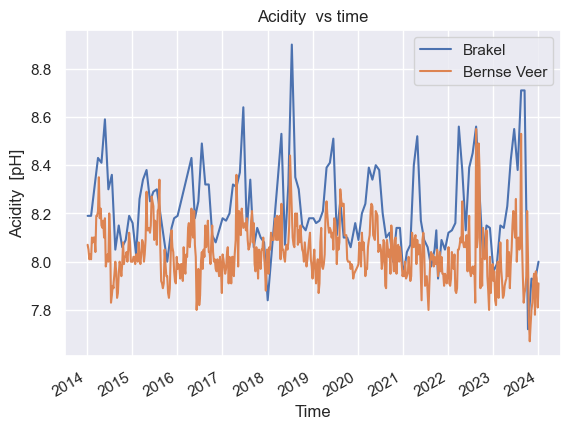

In [4]:
#plotting all data
for df in datasets:
    plot_component(df, save = False)
    

In [5]:
# #Ploting all data for a given year
# years = np.arange(2016,2024)

# for year in years:
#     for df in datasets:
#         df = df.loc[df.index > str(year)]
#         df = df.loc[df.index < str(year+1)]

#         plot_component(df, save = True, title_string = "vs time, 2020", savestring = str(year), subdirectory = "by year")

                    Location Component Unit  Value Reported value
Time                                                             
2024-01-02 07:37:00   Brakel   Acidity   pH   8.00           8.00
2023-12-04 14:08:00   Brakel   Acidity   pH   7.92           7.92
2023-11-06 13:59:00   Brakel   Acidity   pH   7.93           7.93
2023-10-09 06:54:00   Brakel   Acidity   pH   7.72           7.72
2023-09-11 12:50:00   Brakel   Acidity   pH   8.71           8.71
...                      ...       ...  ...    ...            ...
2014-04-28 14:27:00   Brakel   Acidity   pH   8.41           8.41
2014-03-31 13:27:00   Brakel   Acidity   pH   8.43           8.43
2014-03-03 12:48:00   Brakel   Acidity   pH   8.31           8.31
2014-02-03 13:25:00   Brakel   Acidity   pH   8.19           8.19
2014-01-06 14:52:00   Brakel   Acidity   pH   8.19           8.19

[127 rows x 5 columns]


<Axes: xlabel='Time'>

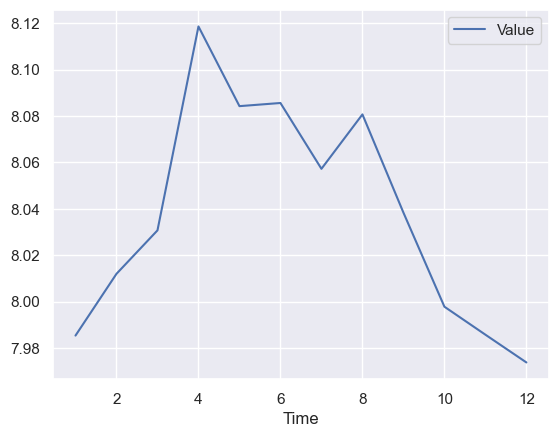

In [6]:
# df_mean = df_sucralose.groupby("M").mean(numeric_only=True)
df_br = df[df["Location"] == "Brakel"]
df_bv = df[df["Location"] == "Bernse Veer"]
df_bv_mean = df_bv.groupby(df_bv.index.month).mean(numeric_only=True)
print(df_br)
# print(df_bv_mean)

# s.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
df_bv_mean.plot()

# plot_component(df_mean, subdirectory = "mean month", save = False)
